# Introduction to Keras and TensorFlow using the Fashion-MNIST dataset

<a href="https://colab.research.google.com/drive/1ZSHGF7eOcipxXyoVnHkMKox2ErLxK6Qv" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
</a>

Return to the [castle](https://github.com/Nkluge-correa/TeenyTinyCastle).

[Keras](https://keras.io/) is an open-source neural network library written in Python that provides a user-friendly interface for building and training deep learning models.

It was developed with a focus on enabling fast experimentation, allowing users to quickly prototype and test different network architectures and optimization techniques. Keras provides a high-level API for building and training neural networks that can run on both CPU and GPU.

It also supports various types of neural networks, including convolutional neural networks (`CNNs`), recurrent neural networks (`RNNs`), and generative adversarial networks (`GANs`).

<img src="https://keras.io/img/logo-k-keras-wb.png" width="450">

[Source](https://keras.io/about/).

In this tutorial, we will implement a neural network not from scratch but using Keras, currently a part of TensorFlow. We will be training our network via `supervised learning`.

Supervised learning is a type of machine learning where the algorithm learns to make predictions by training on a labeled dataset. In supervised learning, the algorithm is presented with a set of input-output pairs, also known as training examples, and learns to map the inputs to the corresponding outputs.

The algorithm aims to learn the underlying patterns and relationships in the data to make accurate predictions on new, unseen data. This labeled dataset is usually split into three parts:

- The model is initially fit on a `training_set`, a set of examples used to fit the model's parameters.
- Successively, the fitted model is used to predict the responses for the observations in a second dataset called the `validation_set`. The validation data set provides an unbiased evaluation of a model fit on the training data set while tuning the model's `hyperparameters` (e.g., the number of hidden units—layers, learning rate, regularization terms).
- Finally, the `test_set` is a dataset used to provide an unbiased evaluation of a _final_ model fit on the training data set.

> Note: When models are developed for real-world applications, it is common to use the train/validation/test split to encounter the best training regime. When this training regime is found, we train our final model with all available data.

![supervised](https://c.tenor.com/Lbfyti3y8UkAAAAC/machine-learning-artificial-intelligence.gif)

[Source](https://tenor.com/pt-BR/view/machine-learning-artificial-intelligence-gif-24276483).

At a high level, neural networks are basically "_fiting machines_" that can approximate many interesting functions when given appropriate `weights`. Something that is stated by the "_[universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)_."

> Note: The universal approximation theorem is a mathematical result that demonstrates that a neural network, given a sufficient number of neurons and layers, can approximate any continuous function on a compact subset of Euclidean space. This means that, in theory, a neural network can learn and represent any complex, nonlinear relationship between inputs and outputs, provided that it has enough neurons in its hidden layer, and the target function is continuous.

<img src="https://media.giphy.com/media/Sbv0CUVrHb5zW/source.gif" width="500">

[Source](https://www.datacamp.com/tutorial/neural-network-models-r#rdl).


Before training our network, let us explore our dataset. In this notebook, we will be using the [`Fashion_MNIST`](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset.

4422102/4422102 [==============================] - 1s 0us/step


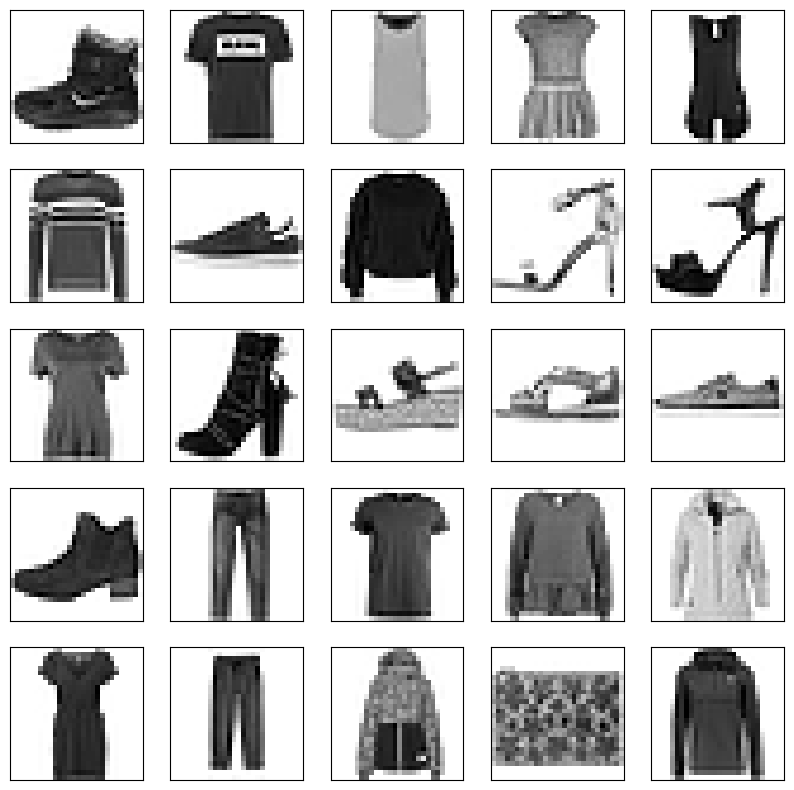

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# fashion_mnist comes with the Keras API
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

# the corresponding name for each class
class_names = ['Shirt', 'Pants', 'Jacket', 'Dress', 'Coat',
               'Sandal', 'Skirt', 'Sneakers', 'Bag', 'Boot']

# normalizing the pixel values of our gray-scale images
train_images = train_images / 255.0
test_images = test_images / 255.0

# creating a validation dataset
val_images = train_images[:10000]
val_labels = train_labels[:10000]

partial_train_images = train_images[0:50000]
partial_train_labels = train_labels[0:50000]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(partial_train_images[i], cmap=plt.cm.binary)
plt.show()

We have a dataset formed by images. Images are highly dimensional data. High-dimensional data refers to datasets that contain a large number of features per input. As the number of features increases, the dimensionality of the data increases. High dimensional data often poses significant challenges for data analysis and machine learning tasks, including the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality), sparsity, and overfitting.

![dimensions](https://i.makeagif.com/media/2-12-2020/ql4GQ6.gif)

[Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmakeagif.com%2Fgif%2Fai-experiments-visualizing-high-dimensional-space-ql4GQ6&psig=AOvVaw2uZcW4W7ci2ajuPANJnRzS&ust=1694019040694000&source=images&cd=vfe&opi=89978449&ved=0CBEQjhxqFwoTCKD34uv2k4EDFQAAAAAdAAAAABAE).

The images in the `Fashion_MNIST` are 28 x 28 pixels. This means that they have 784 features that can vary from 0 to 255 (normalized, they become a real number between 0 and 1). We could, for example, reduce the dimensionality of our dataset if we wanted to reduce the number of features we would use. Or even to explore the data manifold we are working with.

> Note: One of the techniques we can use to do that is `PCA` ([Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)). `PCA` is a dimensionality reduction technique widely used in machine learning, signal processing, and statistics. It is a `linear transformation` method that reduces the number of dimensions in a dataset while retaining most of its variance.

Below, we implement a PCA using [`sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA).

In [2]:
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd

train_images_flatten = train_images.reshape(train_images.shape[0], -1)
df = pd.DataFrame(train_images_flatten)
df['label'] = train_labels
df['label'] = df['label'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], class_names)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(train_images_flatten)


total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    pca_result, x=0, y=1, z=2, color=df['label'],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})

fig.update_layout(template='plotly_dark',
                  title=f'PCA with 3 components - Total Explained Variance: {total_var:.2f}%',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

The data manifold still seems too clumped together. Let us try to do better!

We also can use `t-SNE`, i,e., $t$-distributed stochastic neighbor embedding. `t-SNE` is particularly useful for visualizing complex datasets with nonlinear relationships between variables. Unlike other dimensionality reduction techniques, such as principal component analysis (`PCA`) that focus on preserving the global structure of the data, `t-SNE` focuses on preserving the local structure of the data by modeling the pairwise similarities between data points in high-dimensional space and mapping them to a low-dimensional space.

Since performing a `t-SNE` analysis can take a little while, let us use a smaller portion of our dataset for this step.

In [3]:
from sklearn.manifold import TSNE

df_small = df[:10000]
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(df_small.iloc[:, 0:784].values)

fig = px.scatter_3d(
    tsne_results, x=0, y=1, z=2, color=df_small['label'],
    labels={'0': 't-SNE 1', '1': 't-SNE 2', '2': 't-SNE 3'})

fig.update_layout(template='plotly_dark',
                  title=f't-SNE with 3 components',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)')

fig.show()


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 5.702s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.786951
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.910934
[t-SNE] KL divergence after 500 iterations: 1.469336


Already better! But by combining both techniques, we can create an even better visualization of the manifold.

In [4]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df_small.iloc[:, 0:784].values)

tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=500)
tsne_pca50_results = tsne.fit_transform(pca_result_50)


fig = px.scatter_3d(
    tsne_pca50_results, x=0, y=1, z=2, color=df_small['label'],
    labels={'0': 't-SNE 1', '1': 't-SNE 2', '2': 't-SNE 3'}
)
fig.update_layout(template='plotly_dark',
                  title=f't-SNE with 50 components ranked by PCA - Total Explained Variance: {pca_50.explained_variance_ratio_.sum() * 100:.2f}%',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)')
fig.show()


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 1.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.485685
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.140869
[t-SNE] KL divergence after 500 iterations: 1.381000


Given this visualization, we can already infer that, for example, "Jackets" and "Coats" will be difficult to differentiate.

Now, let us build our neural network. If you would like to watch an incredible well-explained series on neural networks, we recommend [this series](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) (by _3Blue1Brown_).

First, let us set the hyperparameters of our network. Some of these you already know from our last tutorials, like the number of neurons in each layer, the learning rate, and the number of epochs (amounts of time the network processes the entire training set). Other hyperparameters we can tune are, for example:

- `batch`: a subset of the training dataset that is used to update the model's weights during training. Instead of training on the entire dataset at once, the data is divided into smaller batches, and the model is trained on each batch sequentially.
- `Dropout_rate`: a regularization technique used in neural networks to prevent overfitting. During training, a fraction of the nodes in a layer is randomly selected and ignored, or "_dropped out_," during the forward and backward passes. The `dropout_rate` controls the value of this fraction, e.g., 0.5 means to drop 50% of the last layers nodes.

About the layers (neural networks are basically "_onions with layers_") used below, `Flatten`, `Dense`, and `Dropout` are common types of layers used in neural networks:

- `Flatten layer`: The Flatten layer converts a multidimensional input tensor into a one-dimensional tensor.
- `Dense layer`: The Dense layer is a fully connected layer, where every neuron in the layer is connected to every neuron in the previous layer.
- `Dropout layer`: The Dropout layer is a regularization technique that prevents overfitting in neural networks.

In [5]:

HIDDEN_LAYER_01 = 128
HIDDEN_LAYER_02 = 128
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH = 128
DROPOUT_RATE = 0.2

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(
                                        HIDDEN_LAYER_01, activation='relu'),
                                    tf.keras.layers.Dropout(DROPOUT_RATE),
                                    tf.keras.layers.Dense(
                                        HIDDEN_LAYER_02, activation='relu'),
                                    tf.keras.layers.Dropout(DROPOUT_RATE),
                                    tf.keras.layers.Dense(10, activation='softmax')])

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trai

Now, let us train our model. Our usual machine-learning workflow will repeat itself:

- Initialize the model with random parameters.
- Make predictions with this random model.
- Calculate the loss with something like cross entropy (_difference between two probability distributions_).
- Update the parameter of our model using `gradient descent` (we are using [Adam](https://keras.io/api/optimizers/adam/) as our optimizer).

However, while using Keras, we have a couple of utilities in our favor. Citing François Chollet:

> Launching a training run on a large dataset for tens of epochs using `model.fit()` or `model.fit_generator()` can be a bit like launching a paper airplane. Past the initial impulse, you don't have any control over its trajectory or its landing spot. If you want to avoid bad outcomes (and thus wasted paper airplanes), it’s smarter to use not a paper plane, but a drone that can sense its environment, send data back to its operator, and automatically make steering decisions based on its current state.

Instead of having to guess the right training time, we can stop training when our model stops improving according to a given criteria (e.g., validation loss is no longer improving). And we can do this by using a Keras callback. By using callbacks, we can do things like:

- Save the current weights of the model at different points during training.
- Interrupting training when the validation loss is no longer improving (and saving the best model obtained during training).
- Dynamically adjust the value of certain parameters, like the learning rate of the optimizer.
- And [much more](https://keras.io/api/callbacks/)!


In [6]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='accuracy', # Monitors the model’s validation accuracy.
                                    patience=2),  # Interrupts training when accuracy has stopped improving for more than two epoch.
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', # Saves the current weights after every epoch.
                                        monitor='val_loss', # These two arguments mean you won’t overwrite the model file unless val_loss has improved, which allows you to keep the best model seen during training.
                                        save_best_only=True,),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', # Monitors the model’s validation loss.
                                        factor=0.1, # Divides the learning rate by 10 when triggered.
                                        patience=5), # The callback is triggered after the validation loss has stopped improving for 5 epochs.
]

history = model.fit(partial_train_images, partial_train_labels, epochs=EPOCHS,
                    batch_size=BATCH, validation_data=(val_images, val_labels),
                    verbose=1, callbacks=my_callbacks)

test_loss_score, test_acc_score = model.evaluate(test_images, test_labels)

print(f'Final Loss: {test_loss_score:.2f}.')
print(f'Final Performance: {test_acc_score * 100:.2f} %.')

# to save and load the model, uncomment the cells below.

#model.save('my_model.h5')
#model = tf.keras.models.load_model('my_model.h5')


Epoch 1/50
391/391 [==============================] - 4s 8ms/step - loss: 0.6575 - accuracy: 0.7683 - val_loss: 0.4584 - val_accuracy: 0.8297 - lr: 0.0010
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 0.4356 - accuracy: 0.8434 - val_loss: 0.3564 - val_accuracy: 0.8708 - lr: 0.0010
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3981 - accuracy: 0.8565 - val_loss: 0.3327 - val_accuracy: 0.8762 - lr: 0.0010
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3718 - accuracy: 0.8656 - val_loss: 0.3142 - val_accuracy: 0.8814 - lr: 0.0010
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3531 - accuracy: 0.8708 - val_loss: 0.3001 - val_accuracy: 0.8897 - lr: 0.0010
Epoch 6/50
391/391 [==============================] - 3s 8ms/step - loss: 0.3402 - accuracy: 0.8762 - val_loss: 0.2831 - val_accuracy: 0.8936 - lr: 0.0010
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - lo

In our earlier notebooks, we saved our, for example, loss score to plot after the training was over. Keras saves the fit history in a dictionary so we can later retrieve loss/accuracy scores from our training and validation.




In [7]:
import plotly.graph_objects as go

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

fig = go.Figure(layout={'template': 'plotly_dark'})

fig.add_trace(go.Scatter(x=list(epochs), y=acc,
                         line_color='rgba(0, 102, 255, 0.5)', line=dict(width=3, dash='dash'), name='Accuracy (Training)', mode='lines',
                         hoverlabel=dict(namelength=-1),
                         hovertemplate='Accuracy (Training): %{y:.5f} acc <extra></extra>',
                         showlegend=True))
fig.add_trace(go.Scatter(x=list(epochs), y=val_acc,
                         line_color='rgba(255, 0, 0, 0.5)', line=dict(width=3, dash='dash'), name='Accuracy (Validation)', mode='lines',
                         hoverlabel=dict(namelength=-1),
                         hovertemplate='Accuracy (Validation): %{y:.2f} acc <extra></extra>',
                         showlegend=True))


fig.update_layout(
    title='Performance Learning Curves',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)',

)

fig.show()


fig = go.Figure(layout={'template': 'plotly_dark'})

fig.add_trace(go.Scatter(x=list(epochs), y=loss,
                         line_color='rgba(0, 102, 255, 0.5)', line=dict(width=3, dash='dash'), name='Loss (Training)', mode='lines',
                         hoverlabel=dict(namelength=-1),
                         hovertemplate='Loss (Training): %{y:.5f} loss <extra></extra>',
                         showlegend=True))
fig.add_trace(go.Scatter(x=list(epochs), y=val_loss,
                         line_color='rgba(255, 0, 0, 0.5)', line=dict(width=3, dash='dash'), name='Loss (Validation)', mode='lines',
                         hoverlabel=dict(namelength=-1),
                         hovertemplate='Loss (Validation): %{y:.2f} loss <extra></extra>',
                         showlegend=True))

fig.update_layout(
    title='Optimization Learning Curves',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)',

)
fig.show()


Another way to infer our model's results is by a confusion matrix. A confusion matrix is a table used to evaluate the performance of a classification model. It shows the number of correct and incorrect predictions made by the model compared to the actual outcomes. The matrix is often used to calculate performance metrics such as accuracy, precision, recall, and F1-score.

Keras does not have a function to create a ready-to-go `confusion_matrix`, but we can do this with [`scikit-learn`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix).


In [8]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_images)

matrix = confusion_matrix(test_labels, predictions.argmax(axis=1))

fig = px.imshow(matrix,
                labels=dict(x="Predicted", y="True label"),
                x=class_names,
                y=class_names,
                text_auto=True
                )
fig.update_xaxes(side='top')
fig.update_layout(template='plotly_dark',
                  title='Confusion Matrix',
                  coloraxis_showscale=False,
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)')
fig.show()


313/313 [==============================] - 1s 1ms/step


Congratulations, you have trained a neural network using the Keras API and TensorFlow. Now, let us finish this tutorial with this quote from the creator of the Keras Library:

> "_Choosing the right objective function for the right problem is extremely important: your network will take any shortcut it can to minimize the loss; so if the objective is not fully correlated with the success of the task at hand, your network will end up doing things you may not have wanted. Imagine a stupid, omnipotent AI trained via SGD with the following ill-chosen objective function: "maximize the average welfare of all living human beings ". To make its job easier, this AI could choose to kill all but a few humans and concentrate on the welfare of the rest because the average welfare is not affected by how many humans are left. This may be different from what you intended! Just remember that all the neural networks you build will be equally ruthless in reducing your loss function - so choose your goal wisely, or you'll have to deal with unwanted side effects._"

$-$ François Chollet, [_Deep Learning with Python_](https://tanthiamhuat.files.wordpress.com/2018/03/deeplearningwithpython.pdf).


---

Return to the [castle](https://github.com/Nkluge-correa/TeenyTinyCastle).
